## Final Project Submission

Please fill out:
* Student name: Trashae Wiseman
* Student pace: full time
* Scheduled project review date/time: 02/16/2024
* Instructor name: Joseph
/ Blog post URL:


# Introduction

This project seeks to provide understanding and derive insight from a collection of datasets with information about films. The business problem is to give the stakeholder an informed point of entry into the film making businesss. Non-commercial datasets used are sourced IMDb's developer website among other sources. I use python to load, clean, and analyse the information with three (3) specific questions in mind:

1. What are the most Popular Genres?
2. Which Genres have the highest monetary returns?
3. Does a higher production budget translate to higher returns?

I use visualization graphically present the findings and make conclusions bassed off of the business problem. I then make reccomendations based on results of my analysis.

For a more detailed explanation, please see the README.md file

   ## General Libraries

In [12]:
# Import standard packages
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from datetime import datetime

%matplotlib inline


In [13]:
results = sqlite3.connect('zippedData/im.db/im.db')
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tn_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [14]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
index.ipynb
movie_data_erd.jpeg
student.ipynb
zippedData


"Box Office Mojo" data

In [15]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [16]:
#preview the last 5 rows
bom_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


## IMDB Dataset

Let's Explore our IMDB Dataset

In [17]:
%%bash 

sqlite3 zippedData/im.db/im.db
.tables

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


In [18]:
pd.read_sql ('''Select *
                FROM movie_basics''',
            results)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


This DB has some useful tables! The main focus will be movie_basics & movie_ratings


I'll start with movie_ratings

In [19]:
imdbratings=pd.read_sql("""SELECT *
                           FROM movie_ratings"""
                       ,results)

imdbratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
imdbratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
imdbratings.isna().sum()


movie_id         0
averagerating    0
numvotes         0
dtype: int64

Looks like our new dataframe is ok, lets now check movie_basics

In [22]:
imdbtitle= pd.read_sql("""SELECT *
                          From movie_basics""", results
                    )
imdbtitle.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [23]:
imdbtitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The title DF have some missing or null values.

I'll drop original_title colunm and the chnage primary_title to movie

In [24]:
imdbtitle = imdbtitle.drop('original_title',1)
imdbtitle.rename(columns={'primary_title': 'movie'}, inplace=True)

imdbtitle.head(25)


,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,2012,82.0,Biography


Checking if the column has duplicated

In [25]:
imdbtitle['movie'].duplicated().sum()

10073

In [26]:
imdbtitle.loc[imdbtitle['movie'].str.contains('Avatar',case=False)]

,movie_id,movie,start_year,runtime_minutes,genres
22,tt0253093,Gangavataran,2018,134.0,None
1795,tt10168040,My Avatar Horse,2012,NaN,Drama
4315,tt10403262,Xbox Avatar Fun,2019,NaN,Action
11392,tt1630029,Avatar 2,2021,NaN,"Action,Adventure,Fantasy"
14612,tt1720145,Les avatars de la mort d'Empédocle,2010,53.0,Documentary
16337,tt1757678,Avatar 3,2023,NaN,"Action,Adventure,Drama"
17060,tt1775309,Avatar,2011,93.0,Horror
20368,tt1854506,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi"
34245,tt2271191,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama"
51456,tt3053768,Koormavatara,2011,NaN,Drama


The table has multiple duplicated rows. I will now drop only the duplicated rows

In [27]:
#dropping duplicated rows
imdbtitle.drop_duplicates(subset="movie", keep= False, inplace= True)

In [28]:
imdbtitle['movie'].duplicated().sum()

0

Now Exploring the rest of the columns

In [29]:
imdbtitle.isna()

,movie_id,movie,start_year,runtime_minutes,genres
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
146139,False,False,False,False,False
146140,False,False,False,True,False
146141,False,False,False,True,False
146142,False,False,False,False,True


In [30]:
imdbtitle.isnull().sum()

movie_id               0
movie                  0
start_year             0
runtime_minutes    28397
genres              4709
dtype: int64

There is missing values in the columns runtime_minutes & genres. lets explore the genre column first.

In [31]:
imdbtitle['genres'].describe()

count          125180
unique           1058
top       Documentary
freq            30177
Name: genres, dtype: object

In [32]:
imdbtitle['genres'] = imdbtitle['genres'].fillna('Documentary')

In [33]:
#checking code
imdbtitle.isnull().sum()

movie_id               0
movie                  0
start_year             0
runtime_minutes    28397
genres                 0
dtype: int64

Runtime Minutes Descriptive Statistics:
count    129889.000000
mean         86.029633
std         155.756626
min           1.000000
25%          75.000000
50%          86.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64


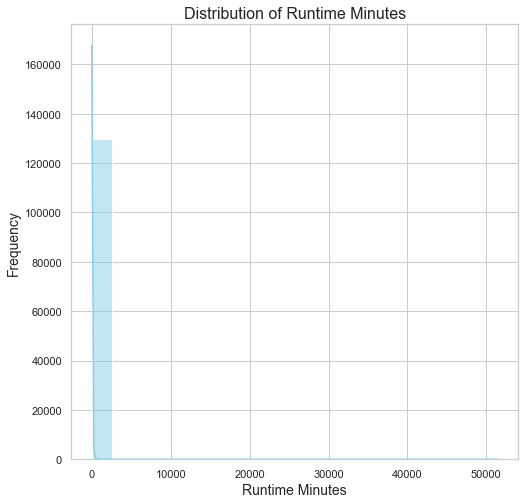

In [87]:
#Plot and stats to understand the distribution of the column

print("Runtime Minutes Descriptive Statistics:")
print(imdbtitle['runtime_minutes'].describe())

plt.figure(figsize=(8, 8)) 

sns.histplot(data=imdbtitle, x='runtime_minutes', bins=20, kde=True, color='skyblue')

plt.title('Distribution of Runtime Minutes', fontsize=16)
plt.xlabel('Runtime Minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

# Handling Missing Values

There is no missing values in the Genres column, lets start exploring runtime column.

In [34]:
imdbtitle['runtime_minutes'].describe()

count    101492.000000
mean         86.037924
std         176.204615
min           1.000000
25%          69.000000
50%          86.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [35]:
imdbtitle.median(
)

start_year         2015.0
runtime_minutes      86.0
dtype: float64

In [36]:
#replacing NaN values with the median

imdbtitle['runtime_minutes'] =imdbtitle['runtime_minutes'].fillna(imdbtitle['runtime_minutes'].median())

In [37]:
#checking the code
imdbtitle.isnull().sum()

movie_id           0
movie              0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [38]:
#checking the DF

imdbtitle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129889 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         129889 non-null  object 
 1   movie            129889 non-null  object 
 2   start_year       129889 non-null  int64  
 3   runtime_minutes  129889 non-null  float64
 4   genres           129889 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.9+ MB


## Merging Dataframes


The dataframe fromTN and IMDB looks as if they are clean. Lets merge them.



I will first start with IMDBTitle & IMDNRating dataframes

In [39]:
# merge dataframes, IMDB dataframes

imdbdata = pd.merge(left=imdbtitle, right=imdbratings, on="movie_id")

In [40]:
imdbdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64842 entries, 0 to 64841
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         64842 non-null  object 
 1   movie            64842 non-null  object 
 2   start_year       64842 non-null  int64  
 3   runtime_minutes  64842 non-null  float64
 4   genres           64842 non-null  object 
 5   averagerating    64842 non-null  float64
 6   numvotes         64842 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [41]:
imdbdata.head()

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,86.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [42]:
imdbdata.isnull().sum()

movie_id           0
movie              0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [43]:
imdbdata.duplicated().sum()

0

The new DF looks good and clean. now lets change the index of the new Dataframe and the budget dataframe to movie column and merge them.

In [44]:
# Changing the index to movie

imdbdata.set_index('movie', inplace=True)
imdbdata.head(5)

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
movie,,,,,,
Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,tt0069204,2018,86.0,"Comedy,Drama",6.1,13
The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [45]:
tn_budget.set_index('movie', inplace=True)
tn_budget.head(25)

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015","$306,000,000","$936,662,225","$2,053,311,220"
Avengers: Infinity War,7,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007","$300,000,000","$309,420,425","$963,420,425"
Justice League,9,"Nov 17, 2017","$300,000,000","$229,024,295","$655,945,209"


In [46]:
# Dropping ID and Movie ID columns from the dataframe

imdbdata = imdbdata.drop('movie_id',1)

In [47]:
imdbdata.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes
movie,,,,,
Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,2018,86.0,"Comedy,Drama",6.1,13
The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
Pál Adrienn,2010,136.0,Drama,6.8,451
So Much for Justice!,2010,100.0,History,4.6,64
Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [48]:
tn_budget.head(25)

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015","$306,000,000","$936,662,225","$2,053,311,220"
Avengers: Infinity War,7,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007","$300,000,000","$309,420,425","$963,420,425"
Justice League,9,"Nov 17, 2017","$300,000,000","$229,024,295","$655,945,209"


In [49]:
# Merging DataFrames

df = pd.merge(left=imdbdata, right=tn_budget, on="movie")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634 entries, Foodfight! to The Terrorist
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_year         1634 non-null   int64  
 1   runtime_minutes    1634 non-null   float64
 2   genres             1634 non-null   object 
 3   averagerating      1634 non-null   float64
 4   numvotes           1634 non-null   int64  
 5   id                 1634 non-null   int64  
 6   release_date       1634 non-null   object 
 7   production_budget  1634 non-null   object 
 8   domestic_gross     1634 non-null   object 
 9   worldwide_gross    1634 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 140.4+ KB


In [51]:
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,,,,,,
Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,16,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732"
Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,65,"Dec 31, 2010","$300,000",$0,$0
Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,15,"Nov 24, 2010","$260,000,000","$200,821,936","$586,477,240"
John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,14,"Mar 9, 2012","$275,000,000","$73,058,679","$282,778,100"
Action Jackson,2014,144.0,"Action,Thriller",3.3,2862,8,"Feb 12, 1988","$7,000,000","$20,257,000","$20,257,000"


Now its a single Dataframe to work in. Now lest take a look at what movies are the top grossing in the new dataframe.

In [52]:
# Creating a new column to verify how much grossing made each movie

df['total_gross']=df['worldwide_gross']=df['production_budget']
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,,
Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$45,000,000","$45,000,000"
The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013","$91,000,000","$58,236,838","$91,000,000","$91,000,000"
A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014","$28,000,000","$26,017,685","$28,000,000","$28,000,000"
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015","$215,000,000","$652,270,625","$215,000,000","$215,000,000"
The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,16,"Oct 28, 2011","$45,000,000","$13,109,815","$45,000,000","$45,000,000"
Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,65,"Dec 31, 2010","$300,000",$0,"$300,000","$300,000"
Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,15,"Nov 24, 2010","$260,000,000","$200,821,936","$260,000,000","$260,000,000"
John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,14,"Mar 9, 2012","$275,000,000","$73,058,679","$275,000,000","$275,000,000"
Action Jackson,2014,144.0,"Action,Thriller",3.3,2862,8,"Feb 12, 1988","$7,000,000","$20,257,000","$7,000,000","$7,000,000"


In [53]:
df = df.sort_values(by=['total_gross'], ascending=False)
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,,
The Peanuts Movie,2015,88.0,"Adventure,Animation,Comedy",7.1,39149,7,"Nov 6, 2015","$99,000,000","$130,178,411","$99,000,000","$99,000,000"
Alien: Covenant,2017,122.0,"Horror,Sci-Fi,Thriller",6.4,226920,12,"May 19, 2017","$97,000,000","$74,262,031","$97,000,000","$97,000,000"
Banshee Chapter,2013,87.0,"Horror,Sci-Fi,Thriller",5.5,8219,30,"Jan 10, 2014","$950,000",$0,"$950,000","$950,000"
Ask Me Anything,2014,100.0,Drama,6.1,10680,33,"Mar 3, 2015","$950,000",$0,"$950,000","$950,000"
Percy Jackson & the Olympians: The Lightning Thief,2010,118.0,"Adventure,Family,Fantasy",5.9,165108,17,"Feb 12, 2010","$95,000,000","$88,768,303","$95,000,000","$95,000,000"
Seventh Son,2014,102.0,"Action,Adventure,Fantasy",5.5,66565,24,"Feb 6, 2015","$95,000,000","$17,725,785","$95,000,000","$95,000,000"
Sex and the City 2,2010,146.0,"Comedy,Drama,Romance",4.4,69199,16,"May 27, 2010","$95,000,000","$95,347,692","$95,000,000","$95,000,000"
Ice Age: Continental Drift,2012,88.0,"Adventure,Animation,Comedy",6.6,175601,14,"Jul 13, 2012","$95,000,000","$161,321,843","$95,000,000","$95,000,000"
Ben-Hur,2016,123.0,"Action,Adventure,Drama",5.7,37975,23,"Aug 19, 2016","$95,000,000","$26,410,477","$95,000,000","$95,000,000"


The DataFrame looks good. But it looks like Avatar has some errors to fix

In [54]:
imdbdata.loc["Avatar"]

start_year           2011
runtime_minutes        93
genres             Horror
averagerating         6.1
numvotes               43
Name: Avatar, dtype: object

In [55]:
#Chnaging the values

df.at['Avatar','genres']= 'Action,Adventure,Sci-Fi'
df.at['Avatar','start_year']= 2009
df.at['Avatar','runtime_minutes'] = 160.0
#We now James Cameron Avatar was a success, i will replace the average rating
# With some high values
df.at['Avatar','averagerating'] = df['averagerating'].max()
df.at['Avatar','numvotes'] = df['numvotes'].max()
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,,
The Peanuts Movie,2015,88.0,"Adventure,Animation,Comedy",7.1,39149,7,"Nov 6, 2015","$99,000,000","$130,178,411","$99,000,000","$99,000,000"
Alien: Covenant,2017,122.0,"Horror,Sci-Fi,Thriller",6.4,226920,12,"May 19, 2017","$97,000,000","$74,262,031","$97,000,000","$97,000,000"
Banshee Chapter,2013,87.0,"Horror,Sci-Fi,Thriller",5.5,8219,30,"Jan 10, 2014","$950,000",$0,"$950,000","$950,000"
Ask Me Anything,2014,100.0,Drama,6.1,10680,33,"Mar 3, 2015","$950,000",$0,"$950,000","$950,000"
Percy Jackson & the Olympians: The Lightning Thief,2010,118.0,"Adventure,Family,Fantasy",5.9,165108,17,"Feb 12, 2010","$95,000,000","$88,768,303","$95,000,000","$95,000,000"
Seventh Son,2014,102.0,"Action,Adventure,Fantasy",5.5,66565,24,"Feb 6, 2015","$95,000,000","$17,725,785","$95,000,000","$95,000,000"
Sex and the City 2,2010,146.0,"Comedy,Drama,Romance",4.4,69199,16,"May 27, 2010","$95,000,000","$95,347,692","$95,000,000","$95,000,000"
Ice Age: Continental Drift,2012,88.0,"Adventure,Animation,Comedy",6.6,175601,14,"Jul 13, 2012","$95,000,000","$161,321,843","$95,000,000","$95,000,000"
Ben-Hur,2016,123.0,"Action,Adventure,Drama",5.7,37975,23,"Aug 19, 2016","$95,000,000","$26,410,477","$95,000,000","$95,000,000"


# Most Popular Geners 

In [56]:
#group by genres
grouped_by_genre = df.groupby("genres", as_index=False)

In [57]:
#explose the resulting groups
grouped_by_genre['numvotes'].sum()

,genres,numvotes
0,Action,58577
1,"Action,Adventure",13945
2,"Action,Adventure,Animation",3063175
3,"Action,Adventure,Biography",297739
4,"Action,Adventure,Comedy",6102131
...,...,...
252,Sci-Fi,587
253,"Sci-Fi,Thriller",30757
254,Thriller,2901
255,War,9


In [58]:
#Find top 5 genres by number of votes
best_genre_by_numvotes = grouped_by_genre['numvotes'].sum().sort_values(
    by='numvotes',  
    ascending=False
    )[:5]
best_genre_by_numvotes 

,genres,numvotes
11,"Action,Adventure,Sci-Fi",24561688
8,"Action,Adventure,Fantasy",7523845
4,"Action,Adventure,Comedy",6102131
67,"Adventure,Animation,Comedy",5996189
30,"Action,Crime,Drama",3770118


In [59]:
# Find top 5 genres by average rating
best_genre_by_avrating = grouped_by_genre['averagerating'].sum().sort_values(
    by = 'averagerating', 
    ascending=False)[:5]
best_genre_by_avrating

,genres,averagerating
192,Drama,515.3
67,"Adventure,Animation,Comedy",391.1
11,"Action,Adventure,Sci-Fi",375.2
131,"Comedy,Drama",354.9
124,Comedy,339.8


In [60]:
#add each item in the above genres to a list
top_genres = []
def splitter(series):
    for item in series['genres']:
        top_genres.extend(item.split(","))


# splitter


splitter(best_genre_by_numvotes)
splitter(best_genre_by_avrating)
# type(best_genre_by_numvotes['genres'])
# print (best_genre_by_numvotes)

# top_genres = [genre for genre in best_genre_by_numvotes['genre'].split(",")]
top_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Drama',
 'Comedy']

In [61]:
#find genres that appear most frequently in the list

def plot_bar_graph(top_genres):
    # Count the occurrences of each genre in the list
    genre_counts = Counter(top_genres)
    
    # Get the unique genres and their corresponding frequencies
    genres, frequencies = zip(*genre_counts.items())
    
    # Create the bar graph with specified figure size (8x8 inches)
    plt.figure(figsize=(8, 8))
    
    # Plot the bar graph
    plt.bar(genres, frequencies, alpha=0.7)
    
    # Set x-axis label to be slanted and improve readability
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Genres")
    plt.ylabel("Relative Popularity")
    plt.title("Bar Graph of Top 5 Most Popular Genres by Weighted Rating")
    
    # Adjust the layout to avoid cutting off labels
    plt.tight_layout()
    
    plt.show()

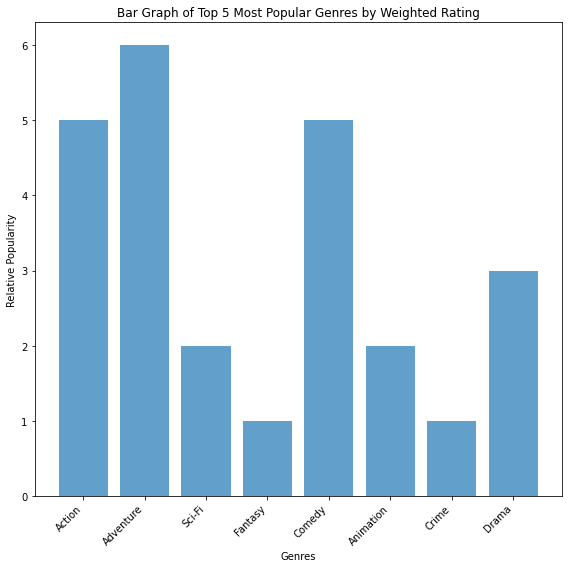

In [62]:
plot_bar_graph (top_genres)

From the Analysis above, Microsoft should consider creating films in the Comedy and Drama genres, followed by Adventure and Action

# Genres with the highest money returns

In [63]:
#preview movie gross df 
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [64]:
#find null percentages
bom_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [65]:
#drop unneeded columns
#foreign_gross will be preserved for use later despite high NaN percentage
bom_gross.drop(['studio', 'year'], 
                    axis=1, 
                    inplace= True)
bom_gross

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3382,The Quake,6200.0,NaN
3383,Edward II (2018 re-release),4800.0,NaN
3384,El Pacto,2500.0,NaN
3385,The Swan,2400.0,NaN


In [66]:
#merge with basics df 
returns_df = bom_gross.merge(imdbdata, 
                                  left_on= "title", 
                                  right_on= "movie")
returns_df.sample(10)

,title,domestic_gross,foreign_gross,start_year,runtime_minutes,genres,averagerating,numvotes
1368,Labyrinth of Lies,794000.0,NaN,2014,124.0,"Drama,History",7.3,10435
1336,He Named Me Malala,2700000.0,97100,2015,88.0,Documentary,6.9,4167
1651,Compadres,3100000.0,NaN,2016,101.0,"Action,Comedy,Crime",4.7,876
1775,A Monster with a Thousand Heads,24900.0,NaN,2015,74.0,"Drama,Thriller",6.6,811
2179,Ryuichi Sakamoto: Coda,117000.0,NaN,2017,100.0,"Documentary,Music",7.7,742
513,A Thousand Words,18500000.0,3600000,2012,91.0,"Comedy,Drama",5.9,36387
305,Machine Gun Preacher,539000.0,2800000,2011,129.0,"Action,Biography,Crime",6.8,60074
1641,Rules Don't Apply,3700000.0,233000,2016,127.0,"Comedy,Drama,Romance",5.7,7794
1212,Hotel Transylvania 2,169700000.0,305100000,2015,89.0,"Animation,Comedy,Family",6.7,92905
208,Dolphin Tale,72300000.0,23100000,2011,113.0,"Drama,Family",6.9,20746


In [67]:
#drop unneeded columns in the new DataFrame
returns_df.drop(['start_year', 'runtime_minutes'], 
                axis=1, 
                inplace=True)
returns_df.sample(10)

,title,domestic_gross,foreign_gross,genres,averagerating,numvotes
566,The Queen of Versailles,2400000.0,NaN,Documentary,7.1,11943
28,Due Date,100500000.0,111200000,"Adventure,Comedy",6.5,303523
1134,The Last Sentence,62500.0,265000,"Biography,Drama",6.1,594
1520,Star Trek Beyond,158800000.0,184600000,"Action,Adventure,Sci-Fi",7.1,209844
354,Another Happy Day,8500.0,347000,"Comedy,Drama",6.0,3793
210,Sucker Punch,36400000.0,53400000,"Action,Adventure,Fantasy",6.1,218371
967,The Grand Budapest Hotel,59300000.0,115500000,"Adventure,Comedy,Crime",8.1,633604
1632,Hunt for the Wilderpeople,5200000.0,NaN,"Adventure,Comedy,Drama",7.9,87532
1679,Gentleman,898000.0,NaN,"Mystery,Romance,Thriller",7.1,1197
1344,Piku,1800000.0,NaN,"Comedy,Drama",7.6,24878


In [68]:
#check for duplicates
returns_df[returns_df.duplicated() == True]

,title,domestic_gross,foreign_gross,genres,averagerating,numvotes


In [69]:
#drop null values
returns_df.dropna(subset=['domestic_gross', 'genres'], 
                  axis=0, 
                  inplace=True)
returns_df

,title,domestic_gross,foreign_gross,genres,averagerating,numvotes
0,Toy Story 3,415000000.0,652000000,"Adventure,Animation,Comedy",8.3,682218
1,Inception,292600000.0,535700000,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,238700000.0,513900000,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,300500000.0,398000000,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,312400000.0,311500000,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...
2208,Marlina the Murderer in Four Acts,17800.0,NaN,"Drama,Thriller",7.0,1724
2209,Let Yourself Go,12200.0,NaN,Comedy,6.1,749
2210,Beauty and the Dogs,8900.0,NaN,"Crime,Drama,Thriller",7.0,1016
2211,The Quake,6200.0,NaN,"Action,Drama,Thriller",6.2,5270


In [70]:
#group by genres
gross_by_genre = returns_df.groupby("genres", as_index=False)
gross_by_genre.head()

,title,domestic_gross,foreign_gross,genres,averagerating,numvotes
0,Toy Story 3,415000000.0,652000000,"Adventure,Animation,Comedy",8.3,682218
1,Inception,292600000.0,535700000,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,238700000.0,513900000,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,300500000.0,398000000,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,312400000.0,311500000,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...
2182,The Dawn Wall,112000.0,NaN,"Adventure,Biography,Documentary",8.1,6993
2190,Just a Breath Away,78000.0,NaN,Sci-Fi,5.9,3501
2192,Tehran Taboo,74800.0,NaN,"Animation,Drama",7.0,2429
2198,Before We Vanish,52100.0,NaN,"Drama,Sci-Fi",5.9,1154


In [71]:
# Find top 5 earning genres 
top5_by_gross = gross_by_genre['domestic_gross'].sum().sort_values(by="domestic_gross", 
                                                                   ascending=False
                                                                   )[:10]
top5_by_gross

,genres,domestic_gross
11,"Action,Adventure,Sci-Fi",1.088780e+10
74,"Adventure,Animation,Comedy",8.284926e+09
8,"Action,Adventure,Fantasy",3.920687e+09
4,"Action,Adventure,Comedy",3.123877e+09
2,"Action,Adventure,Animation",2.184660e+09
12,"Action,Adventure,Thriller",1.746498e+09
42,"Action,Crime,Thriller",1.650325e+09
153,Comedy,1.606949e+09
191,"Comedy,Romance",1.528564e+09
24,"Action,Comedy,Crime",1.488272e+09


In [72]:
#add each item in the above genres to a list
top_genres = []

splitter(top5_by_gross)

top_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Comedy',
 'Romance',
 'Action',
 'Comedy',
 'Crime']

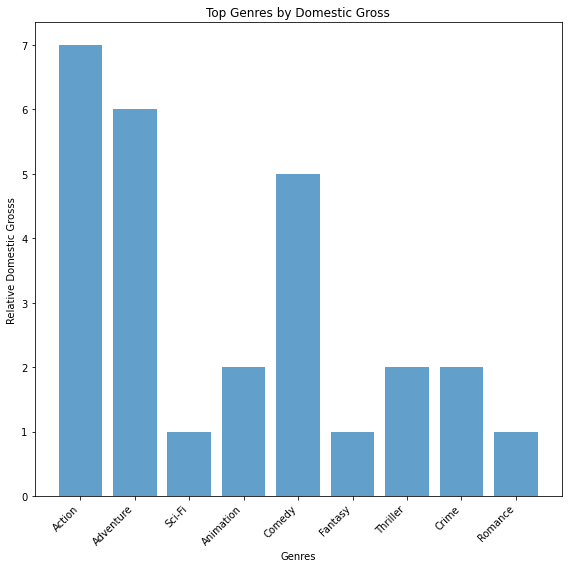

In [73]:
#find genres that appear most frequently in the list

def plot_bar_graph(top_genres):
    # Count the occurrences of each genre in the list
    genre_counts = Counter(top_genres)
    
    # Get the unique genres and their corresponding frequencies
    genres, frequencies = zip(*genre_counts.items())
    
    # Create the bar graph with specified figure size (8x8 inches)
    plt.figure(figsize=(8, 8))
    
    # Plot the bar graph
    plt.bar(genres, frequencies, alpha=0.7)
    
    # Set x-axis label to be slanted and improve readability
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Genres")
    plt.ylabel("Relative Domestic Grosss")
    plt.title("Top Genres by Domestic Gross")
    
    # Adjust the layout to avoid cutting off labels
    plt.tight_layout()
    
    plt.show()

plot_bar_graph (top_genres)

From the analysis, what should be considered for creating films would be in Adventure, Action, Comedy.

#  Will a higher production budget translate to higher returns?

In [75]:
tn_budget.sample(10)

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
The Love Letter,10,"May 21, 1999","$15,000,000","$8,322,608","$9,010,980"
The Image Revolution,26,"Dec 31, 2014","$50,000",$0,$0
mother!,59,"Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076"
Collateral Damage,18,"Feb 8, 2002","$85,000,000","$40,048,332","$78,353,508"
Prophecy,83,"Jun 15, 1979","$12,000,000","$22,673,340","$22,673,340"
De rouille et dâos,20,"Nov 23, 2012","$19,500,000","$2,061,449","$29,393,634"
PMC: deo beong-keo,32,"Jan 4, 2019","$10,300,000",$0,"$12,478,635"
Rent,79,"Nov 23, 2005","$40,000,000","$29,077,547","$31,670,620"
Wal-Mart: The High Cost of Low Price,9,"Nov 4, 2005","$1,500,000",$0,"$58,692"


In [76]:
#check null counts for each column
tn_budget.isnull().sum()

id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [77]:
#check column data types
tn_budget.dtypes

id                    int64
release_date         object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [78]:
#handle ','-separated currency, remove '$' sign and convert to float 

tn_budget[['production_budget',
        'domestic_gross', 
        'worldwide_gross']] = tn_budget[['production_budget',                                     
                                      'domestic_gross', 
                                      'worldwide_gross']].apply(lambda row: row.apply(
                                          lambda x: float(str(x).replace(',', '').replace('$', ''))),
                                                 axis = 1
                                                 )

In [79]:
tn_budget = tn_budget[['production_budget', 'worldwide_gross']]

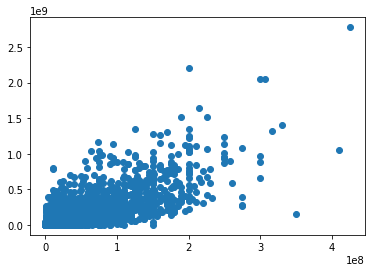

In [80]:
plt.scatter(x = tn_budget['production_budget'] , y= tn_budget['worldwide_gross' ])

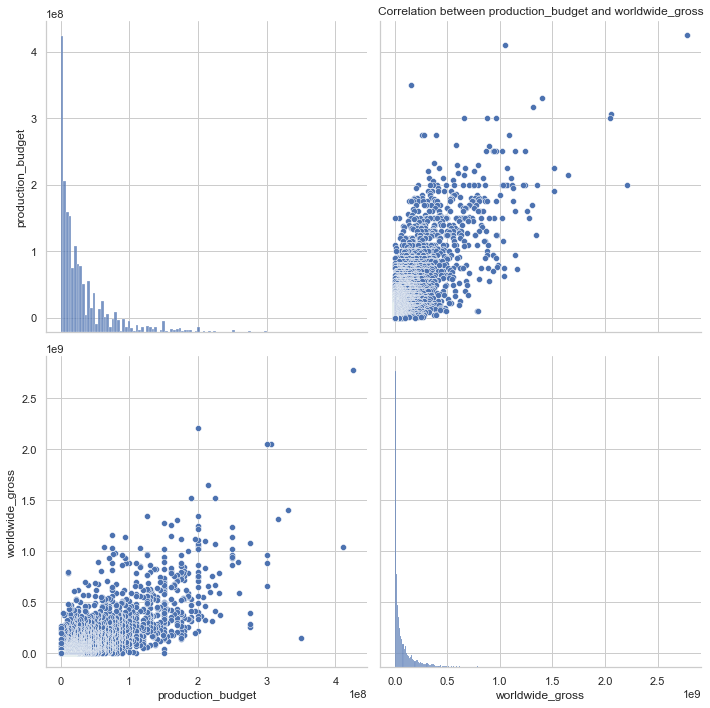

In [81]:
#Plot the correlation between domestic gross and total gross
sns.set(style='whitegrid')
sns.pairplot(tn_budget, height= 5)
plt.title(f"Correlation between {tn_budget.columns[0]} and {tn_budget.columns[1]}")
plt.tight_layout()
plt.show();

In [83]:
tn_budget['production_budget'].corr(tn_budget['worldwide_gross'])

0.7483059765694758

The analysis shows a moderate to strong positive correlation between a film's production budget and its worldwide gross returns.

## Conclusion

------------------------------------------------------------------------------

 I would recommend that the stakeholder considers creating films in Adventure, Action, Comedy and Drama genres.
I would also reccommend that they consider investing higher production budgets as there is a positive correlation between the said budget and returns on investments

While this analysis gives a clear go-ahead, there could be more significant or external environmental factors that could sway the decision reached herein otherwise. As I grow as a Data Scientist, I hope to learn more and later improve the code, reasoning and logic presented in this project.

